## Compare the similarities of the synthietic data with real data based on some evalutation matrices

### Step 0: Visualizing our Model


In [1]:
import torch
from GANModels import *
from torchsummary import summary

In [2]:
running_model = Generator(seq_len=150, channels=3, latent_dim=100)
running_ckp = torch.load('./pre-trained-models/RunningGAN_checkpoint', map_location=torch.device("cpu"))
running_model.load_state_dict(running_ckp['gen_state_dict'])
        
jumping_model = Generator(seq_len=150, channels=3, latent_dim=100)
jumping_ckp = torch.load('./pre-trained-models/JumpingGAN_checkpoint', map_location=torch.device("cpu"))
jumping_model.load_state_dict(jumping_ckp['gen_state_dict'])

#running_model, jumping_model

<All keys matched successfully>

In [3]:
#summary(running_model, input_size=(150,3,100), batch_size=1, device="cpu")

In [4]:
#summary(jumping_model, input_size=(150,3,100), batch_size=1, device="cpu")

### Step 1: Load Real running and Jumping data

In [5]:
from LoadRealRunningJumping import *
from torch.utils import data

In [6]:
train_set = Running_Or_Jumping(incl_xyz_accel = True, 
                               incl_rms_accel = False, 
                               is_normalize = True, 
                               data_mode = 'Train',
                               data_path = './UniMiB-SHAR')

./UniMiB-SHAR


data shape is (1200, 3, 1, 150), label shape is (1200, 1)
Jumping label is 1, has 600 samples, Running label is 0, has 600 samples


We can see that the input data is in shape 3, 1, 150, and our generator have input 150, 3, thats because our data is viewed as an image with *width=1*, and *height=150*, with a *color channel=3*

In [7]:
acc_data,label_data = train_set[:][0],train_set[:][1]

In [8]:
print(f'Batch size: {len(train_set)}  | data shape{train_set[0][0].shape}')

Batch size: 1200  | data shape(3, 1, 150)


In [9]:
train_set[0][0][0]

array([[ 3.02949763e-01,  3.02949763e-01,  2.75591275e-01,
         2.75591275e-01,  2.75591275e-01,  8.40817465e-02,
        -1.07427740e-01, -4.08371177e-01, -5.45163616e-01,
        -4.35729665e-01, -3.53654201e-01, -2.71578666e-01,
        -2.44220179e-01,  2.93648423e-02,  2.75591275e-01,
         4.12383743e-01,  5.21817723e-01,  6.31251717e-01,
         5.76534727e-01,  3.85025234e-01,  3.02949763e-01,
         1.38798793e-01,  1.11440306e-01,  2.48232745e-01,
         1.93515769e-01,  3.02949763e-01,  1.11440306e-01,
         1.38798793e-01,  2.93648423e-02,  1.11440306e-01,
         1.93515769e-01,  8.40817465e-02,  1.66157281e-01,
         2.00628308e-03, -1.34786227e-01, -1.34786227e-01,
        -8.00692517e-02,  2.93648423e-02,  2.93648423e-02,
         8.40817465e-02,  2.93648423e-02,  5.67232587e-02,
         1.66157281e-01,  1.38798793e-01,  2.48232745e-01,
         2.48232745e-01,  1.66157281e-01,  2.20874257e-01,
         1.11440306e-01,  1.66157281e-01,  1.66157281e-0

In [10]:
real_data_loader = data.DataLoader(train_set, batch_size=1, num_workers=1, shuffle=True)

In [11]:
import matplotlib.pyplot as plt
real_running = []
real_jumping = []

for i, (real_sig, label) in enumerate(real_data_loader):
    real_sig = real_sig.cpu().detach().numpy()
    sig = real_sig.reshape(real_sig.shape[1], real_sig.shape[3])
    if label[0] == 0:
        real_running.append(sig)
    elif label[0] == 1:
        real_jumping.append(sig)

real_running = np.array(real_running)
real_jumping = np.array(real_jumping)
print(real_running.shape)
print(real_jumping.shape)

(600, 3, 150)
(600, 3, 150)


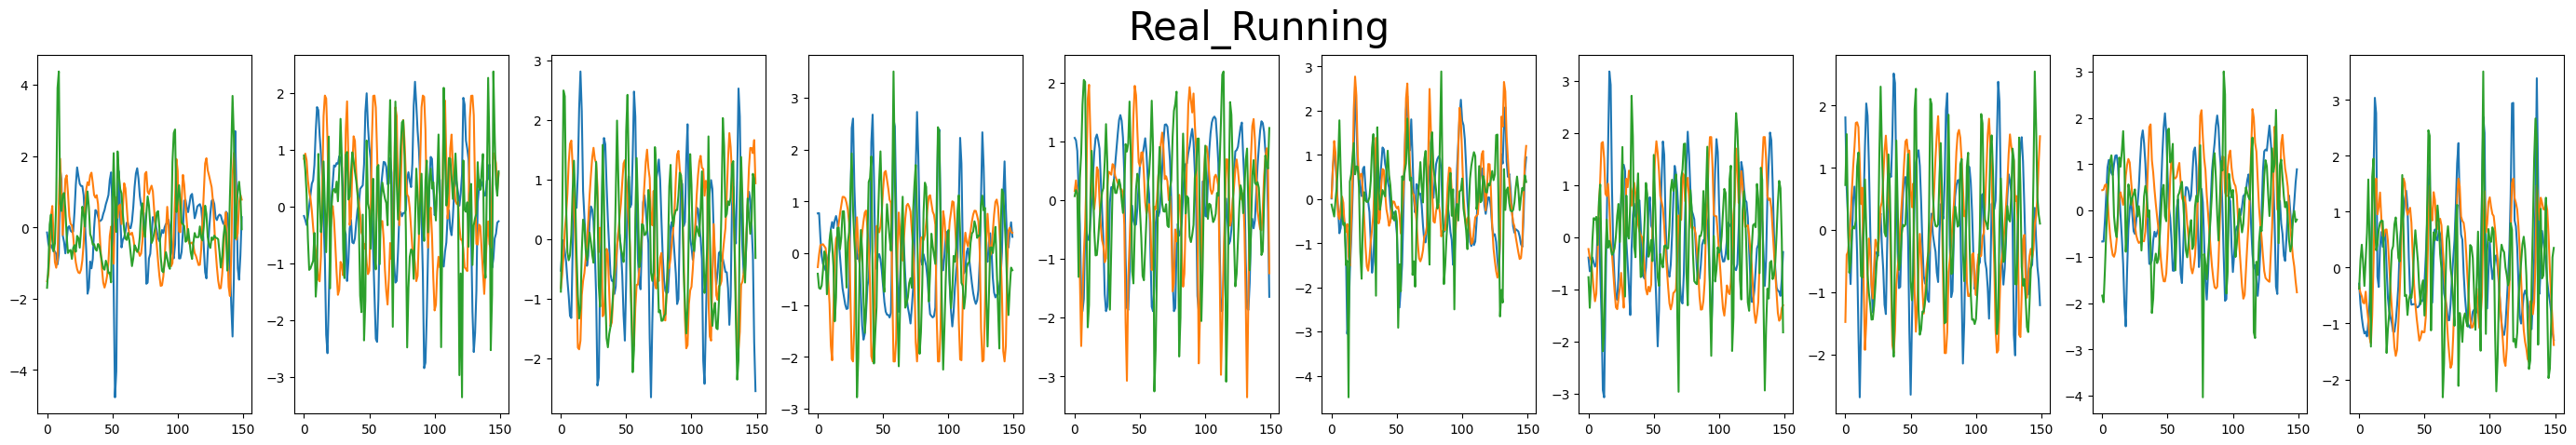

In [12]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Real_Running', fontsize=30)
for i in range(10):
    axs[i].plot(real_running[i][0][:], c='red')
    axs[i].plot(real_running[i][1][:], c='rg')
    axs[i].plot(real_running[i][2][:])

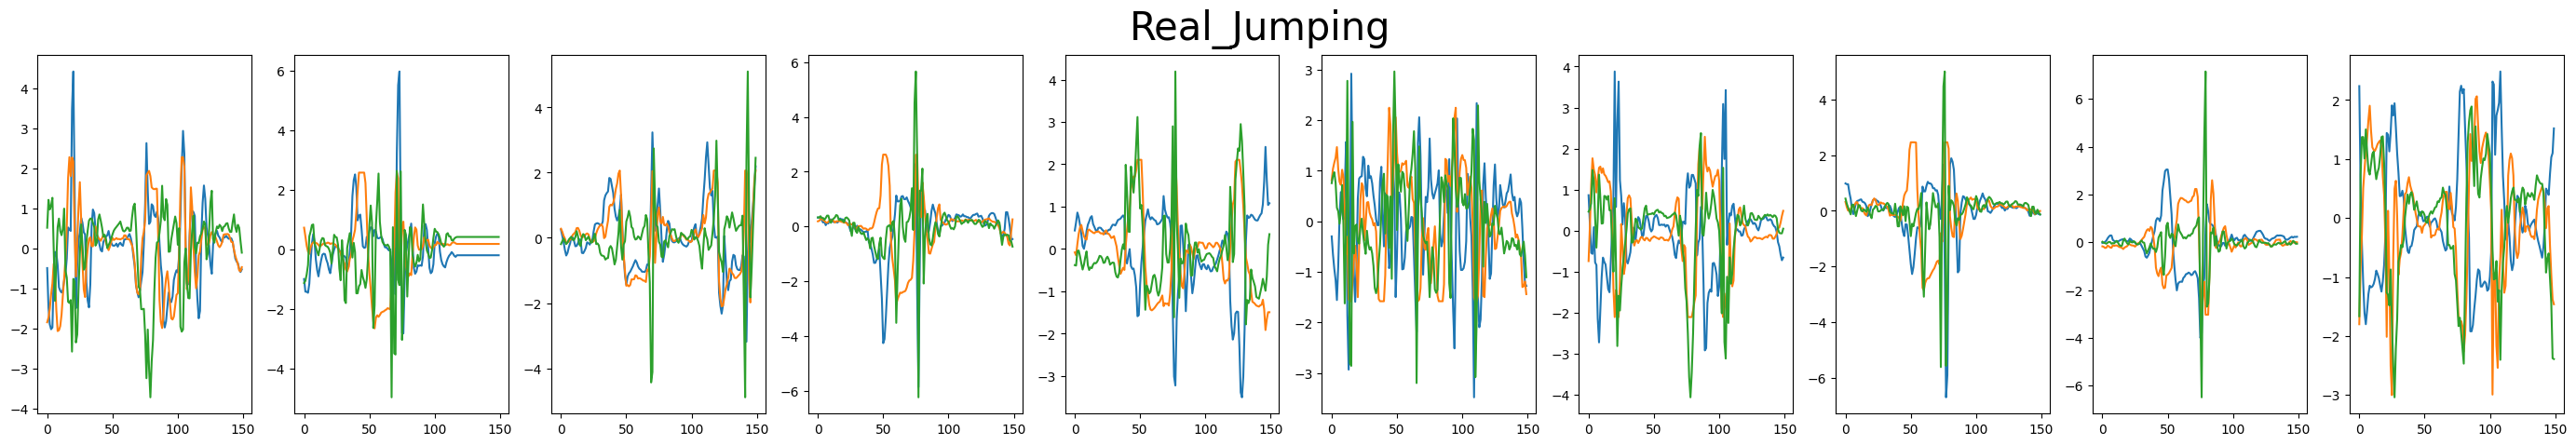

In [13]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Real_Jumping', fontsize=30)
for i in range(10):
    axs[i].plot(real_jumping[i][0][:])
    axs[i].plot(real_jumping[i][1][:])
    axs[i].plot(real_jumping[i][2][:])

### Step 2: Load synthetic running and jumping data

In [14]:
from LoadSyntheticRunningJumping import *
from torch.utils import data

In [15]:
syn_data = Synthetic_Dataset()

(2000, 3, 1, 150)
(2000, 1)


In [16]:
syn_data_loader = data.DataLoader(syn_data, batch_size=1, num_workers=1, shuffle=True)

In [17]:
import matplotlib.pyplot as plt
syn_running = []
syn_jumping = []

for i, (syn_sig, label) in enumerate(syn_data_loader):
    syn_sig = syn_sig.cpu().detach().numpy()
    sig = syn_sig.reshape(syn_sig.shape[1], syn_sig.shape[3])
    if label[0] == 0:
        syn_running.append(sig)
    elif label[0] == 1:
        syn_jumping.append(sig)

syn_running = np.array(syn_running)
syn_jumping = np.array(syn_jumping)
print(syn_running.shape)
print(syn_jumping.shape)

(1000, 3, 150)
(1000, 3, 150)


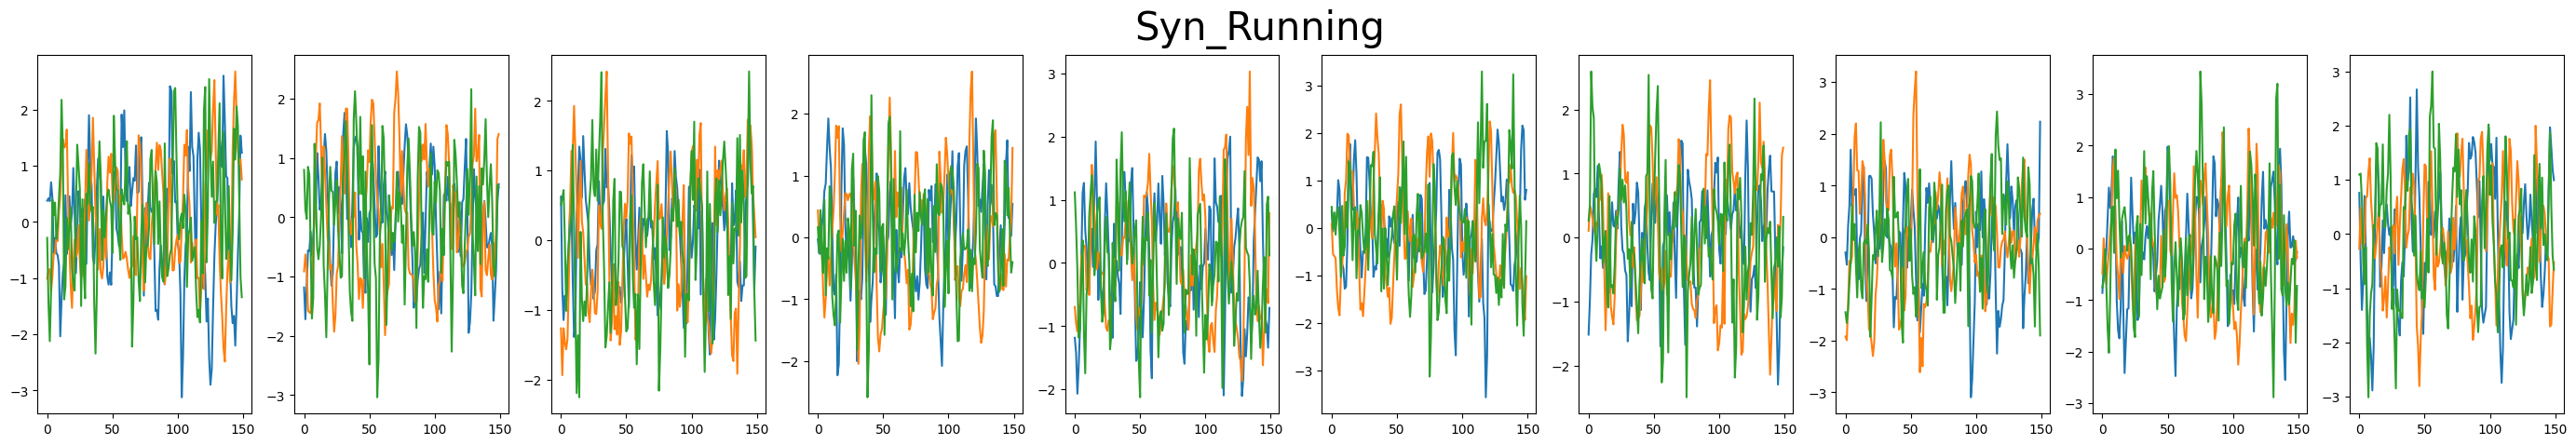

In [18]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Syn_Running', fontsize=30)
for i in range(10):
    axs[i].plot(syn_running[i][0][:])
    axs[i].plot(syn_running[i][1][:])
    axs[i].plot(syn_running[i][2][:])

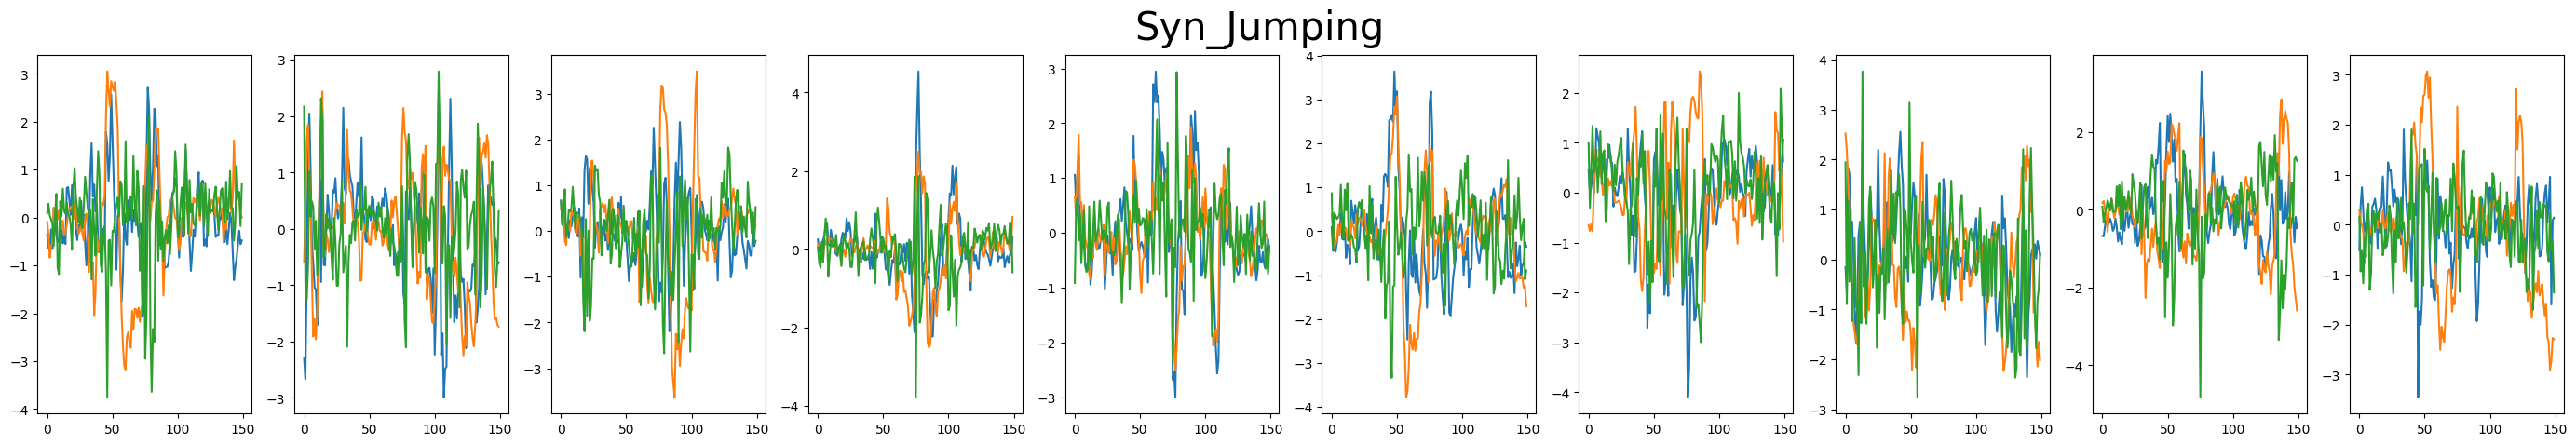

In [19]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Syn_Jumping', fontsize=30)
for i in range(10):
    axs[i].plot(syn_jumping[i][0][:])
    axs[i].plot(syn_jumping[i][1][:])
    axs[i].plot(syn_jumping[i][2][:])

tensor([14])


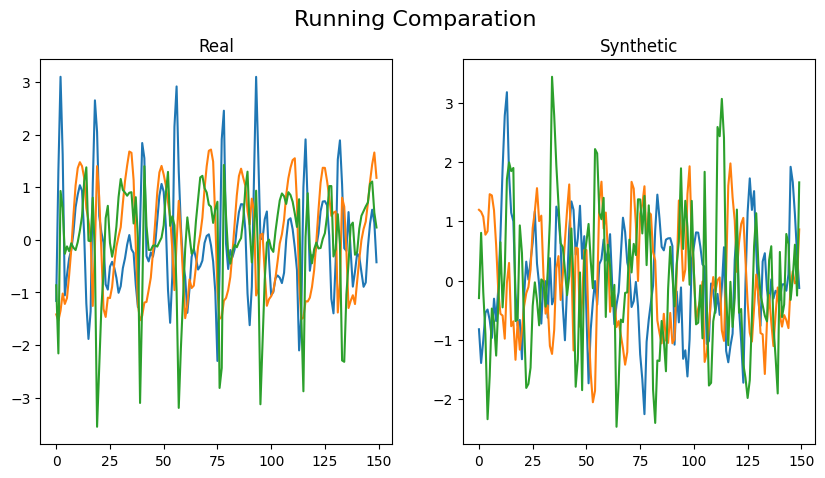

In [20]:
a = torch.randint(low=0,high=500,size=(1,))
print(a)
fig,axs = plt.subplots(1,2,figsize=(10,5), sharex=True)
fig.suptitle('Running Comparation', fontsize=16)
axs[0].plot(real_running[a].transpose())
axs[0].set_title('Real')
axs[1].plot(syn_running[a].transpose())
axs[1].set_title(f'Synthetic');

### Step 3: PCA & TSNE

In [21]:
print(real_running.shape)
print(real_jumping.shape)
print(syn_running.shape)
print(syn_jumping.shape)

(600, 3, 150)
(600, 3, 150)
(1000, 3, 150)
(1000, 3, 150)


In [22]:
real_running = np.transpose(real_running, (0, 2, 1))
real_jumping = np.transpose(real_jumping, (0, 2, 1))
syn_running = np.transpose(syn_running, (0, 2, 1))
syn_jumping = np.transpose(syn_jumping, (0, 2, 1))
print(real_running.shape)
print(real_jumping.shape)
print(syn_running.shape)
print(syn_jumping.shape)

(600, 150, 3)
(600, 150, 3)
(1000, 150, 3)
(1000, 150, 3)


In [23]:
from visualizationMetrics import visualization

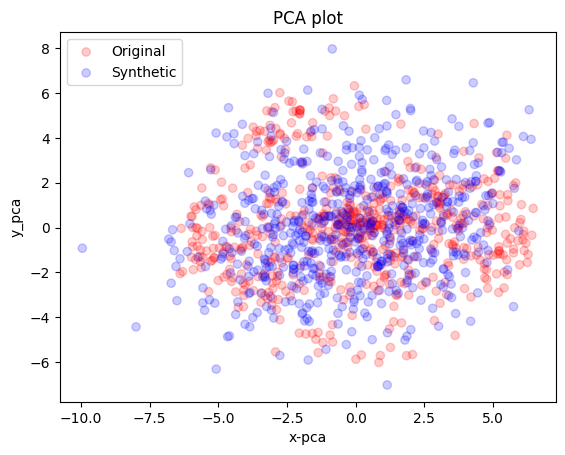

In [24]:
visualization(real_running, syn_running, 'pca', 'Running-pca')

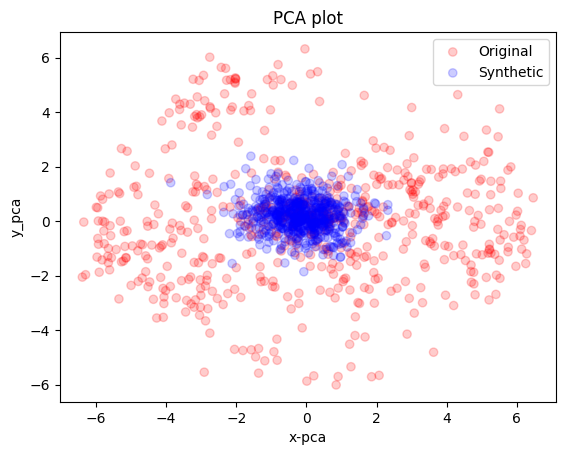

In [25]:
visualization(real_running, syn_jumping, 'pca', save_name='test_real_running_syn_jumping')

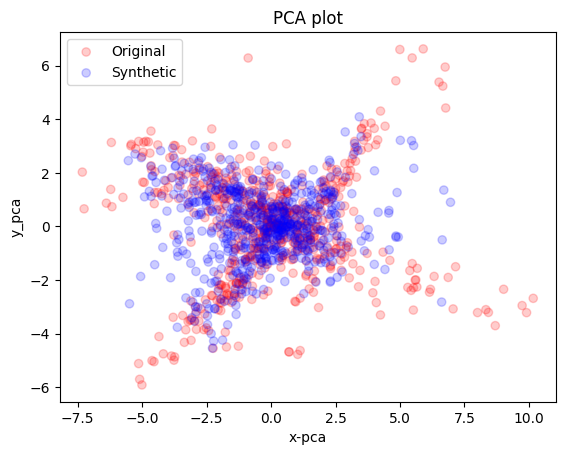

In [26]:
visualization(real_jumping, syn_jumping, 'pca', 'Jumping-pca')

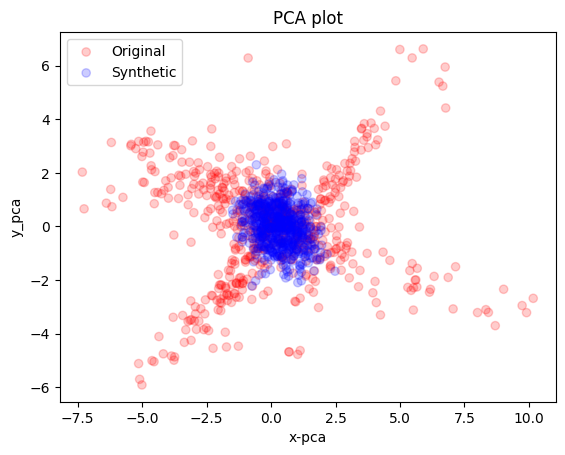

In [27]:
visualization(real_jumping, syn_running, 'pca', save_name='test_real_jumping_syn_rrunning')

(1200, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.001s...
[t-SNE] Computed neighbors for 1200 samples in 0.183s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 2.302808


[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.070412
[t-SNE] KL divergence after 300 iterations: 1.737168


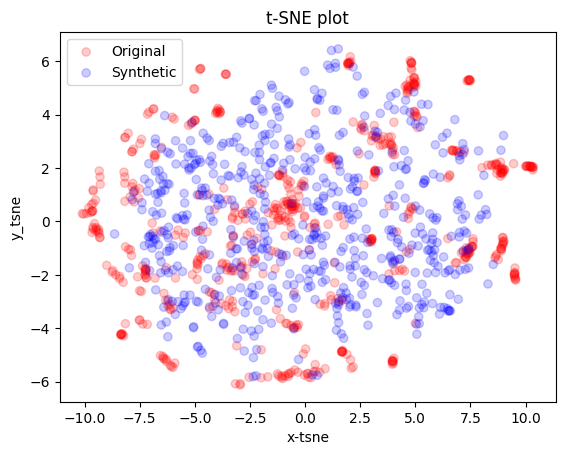

In [28]:
visualization(real_running, syn_running, 'tsne', 'Running-tsne')

(1200, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.000s...
[t-SNE] Computed neighbors for 1200 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 2.316230


[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.915184
[t-SNE] KL divergence after 300 iterations: 1.617371


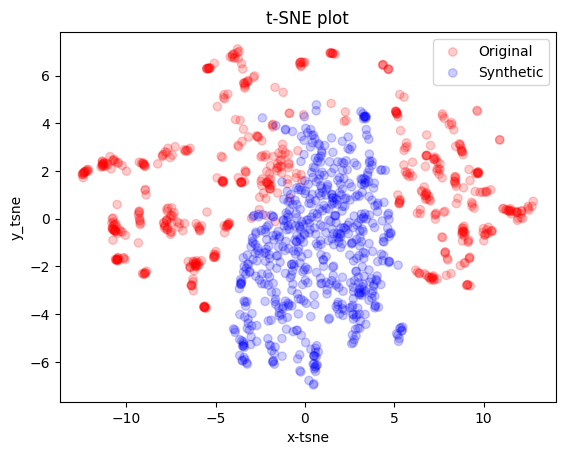

In [29]:
visualization(real_running, syn_jumping, 'tsne', 'Real-R_Syn_J-tsne')

(1200, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.000s...
[t-SNE] Computed neighbors for 1200 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 2.174666


[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.894051
[t-SNE] KL divergence after 300 iterations: 1.867371


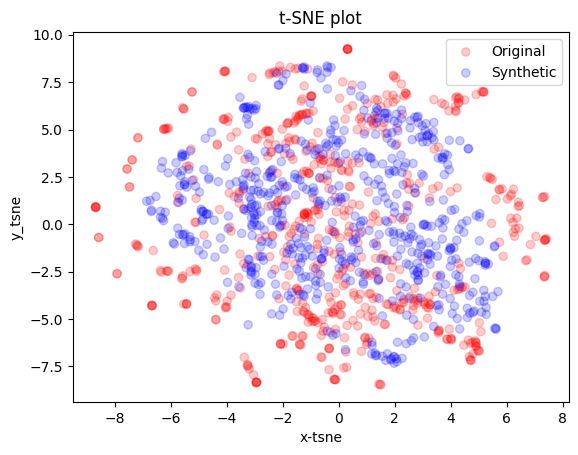

In [30]:
visualization(real_jumping, syn_jumping, 'tsne', 'Jumping-tsne')

(1200, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.000s...
[t-SNE] Computed neighbors for 1200 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 2.363311


[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.187485
[t-SNE] KL divergence after 300 iterations: 1.860733


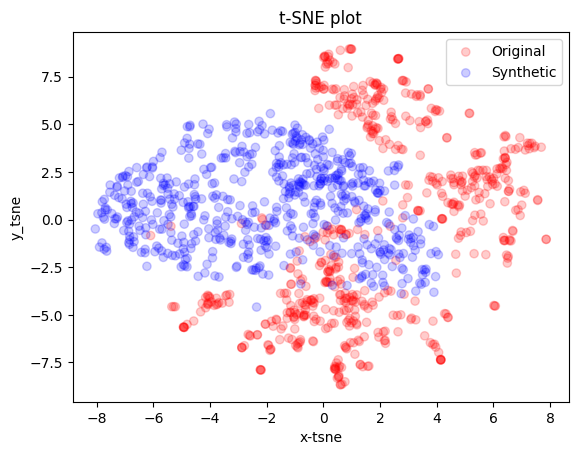

In [31]:
visualization(real_jumping, syn_running, 'tsne', 'Real-J_Syn_R-tsne')

In [32]:
from sklearn.manifold import TSNE

def TSNE_visualization(running_original, jumping_original, running_synthetic, jumping_synthetic):

    l = len(running_original)
    idx = np.random.permutation(len(running_original))

    # Data preprocessing
    running_original = np.asarray(running_original)
    running_synthetic = np.asarray(running_synthetic)  
    jumping_original = np.asarray(jumping_original)
    jumping_synthetic = np.asarray(jumping_synthetic)

    running_original = running_original[idx]
    running_synthetic = running_synthetic[idx]
    jumping_original = jumping_original[idx]
    jumping_synthetic = jumping_synthetic[idx]
    

    no, seq_len, dim = running_original.shape  

    for i in range(l):
        if (i == 0):
            prep_running = np.reshape(np.mean(running_original[0,:,:], 1), [1, seq_len])
            prep_running_hat = np.reshape(np.mean(running_synthetic[0,:,:], 1), [1, seq_len])
            prep_jumping = np.reshape(np.mean(jumping_original[0,:,:], 1), [1, seq_len])
            prep_jumping_hat = np.reshape(np.mean(jumping_synthetic[0,:,:], 1), [1, seq_len])

        else:
            prep_running = np.concatenate((prep_running, 
                                        np.reshape(np.mean(running_original[i,:,:],1), [1, seq_len])))
            prep_running_hat = np.concatenate((prep_running_hat, 
                                        np.reshape(np.mean(running_synthetic[i,:,:],1), [1, seq_len])))
            prep_jumping = np.concatenate((prep_jumping,
                                        np.reshape(np.mean(jumping_original[i,:,:], 1), [1, seq_len])))
            prep_jumping_hat = np.concatenate((prep_jumping_hat,
                                        np.reshape(np.mean(jumping_synthetic[i,:,:], 1), [1, seq_len])))
    
    # Do t-SNE Analysis together       
    prep_data_final = np.concatenate((prep_running, prep_jumping, prep_running_hat, prep_jumping_hat), axis = 0)
    print(prep_data_final.shape)
    # TSNE anlaysis
    tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
    tsne_results = tsne.fit_transform(prep_data_final)
    print(tsne_results.shape)
    # Plotting
    f, ax = plt.subplots(1)

    plt.scatter(tsne_results[:600,0], tsne_results[:600,1], 
                c = 'red', alpha = 0.2, label = "Running Original")

    plt.scatter(tsne_results[1200:1800,0], tsne_results[1200:1800,1], 
                c = 'purple', alpha = 0.2, label = "Running Synthetic")
    
    plt.scatter(tsne_results[600:1200,0], tsne_results[600:1200,1], 
                c = 'blue', alpha = 0.2, label = "Jumping Original")
    
    plt.scatter(tsne_results[1800:,0], tsne_results[1800:,1], 
                c = 'green', alpha = 0.2, label = "Jumping Synthetic")

    ax.legend()

    plt.title('t-SNE plot')
    plt.xlabel('x-tsne')
    plt.ylabel('y_tsne')
    #         plt.show()    

    plt.show()

(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.101s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 2.137874


[t-SNE] KL divergence after 150 iterations with early exaggeration: 74.319084
[t-SNE] KL divergence after 300 iterations: 2.036906
(2400, 2)


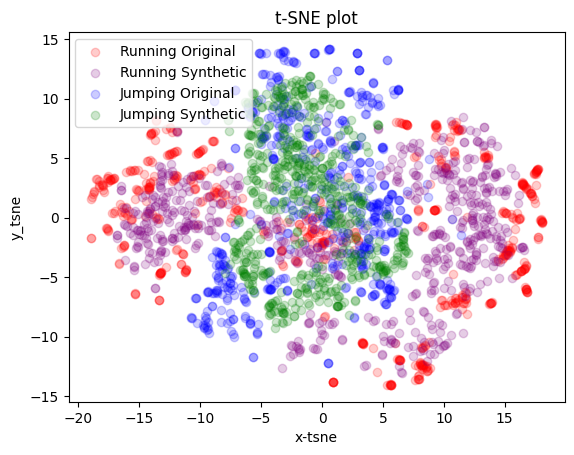

In [33]:
TSNE_visualization(real_running, real_jumping, syn_running, syn_jumping)

### Step 4: Evaluation

In [34]:
def getEnergyFromTensor(data: torch.tensor):
    '''
    gets the energy or s² = x² + y² + z²
    
    parameters:
        input:
            data -> Tensor
        return:
            s = (x² + y² + z²)^(0.5)
    '''
    #print(data.shape)
    x = data[:,0]
    #print(x.shape)
    y = data[:,1]
    #print(y.shape)
    z = data[:,2]
    #print(z.shape)
    s = (x**2 + y**2 + z**2)**0.5
    #print(s.shape)
    return s

In [35]:
def rootMeanSquare(data: torch.tensor):
    
    return torch.sqrt((data**2).mean(dim=-1))

In [36]:
def simpleFeatureExtractor(data: torch.tensor, squeeze: int = 2, dim: int = -1):
    '''
    A simple feature extractor of several meaningful features from each input
    data sequence. They are the median, mean, standard deviation, variance, root
    mean square, maximum, and minimum values of each input sequence. 

    The tensor is expected to be in shape (600, 3, 1, 150), with 600 of batch, 
    3 channels (x,y,z), height 1 and width 150 (time)

    parameters:
        input:
            data -> The tensor from which we will extract the features
            squeeze -> which dimention we'll squeeze
            dim -> dimention of the time channels (for our purposes is the last one)
    
    '''
    data.squeeze(dim=squeeze)
    #print(data.shape)
    fmedian = getEnergyFromTensor(data.median(dim=dim)[0])
    fmean = getEnergyFromTensor(data.mean(dim=dim))
    fstd = getEnergyFromTensor(data.std(dim=dim))
    fvar = getEnergyFromTensor(data.var(dim=dim))
    frms = getEnergyFromTensor(rootMeanSquare(data))
    fmax = getEnergyFromTensor(data.max(dim=dim)[0])
    fmin = getEnergyFromTensor(data.min(dim=dim)[0])
    
    return torch.cat((fmedian, fmean, fstd, fvar, frms, fmax, fmin), dim=1)

In [37]:
simple_syn_running = simpleFeatureExtractor(data=syn_running)
simple_syn_jumping = simpleFeatureExtractor(data=syn_jumping)
simple_real_running = simpleFeatureExtractor(data=real_running)
simple_real_jumping = simpleFeatureExtractor(data=real_jumping)

TypeError: squeeze() got an unexpected keyword argument 'dim'